In [ ]:
#@title 그래프 해상도 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})
%config InlineBackend.figure_format = 'retina'

In [ ]:
#@title 한글 글자 폰트 변경 -> 나눔 폰트

#import matplotlib.pyplot as plt
#plt.rc('font', family='NanumBarunGothic')

#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
#@title 라이브러리 및 CSV파일
import folium
import json
import glob
import os
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rc('font', family='NanumBarunGothic')

suso = pd.read_csv('/content/Public_data/22.2_자치구별_수소차_차종별.csv')
electro = pd.read_csv('/content/Public_data/22.2_자치구별_전기차_차종별.csv')
result = pd.read_csv('/content/Public_data/자동차+등록현황(연료별).csv')
charge = pd.read_csv('/content/Public_data/한국도로공사_충전소 현황_20210901.csv',encoding='CP949')



In [ ]:
#@title 데이터 전처리

#NaN 개수 확인
suso.isnull().sum(axis=0)

#NaN 있는 행 0으로 채우기
suso.fillna(0) 

#중복데이터 확인
suso.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

In [ ]:
#NaN 개수 확인
electro.isnull().sum(axis=0)

#NaN 있는 행 0으로 채우기
electro.fillna(0) 

#중복데이터 확인
electro.duplicated()


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

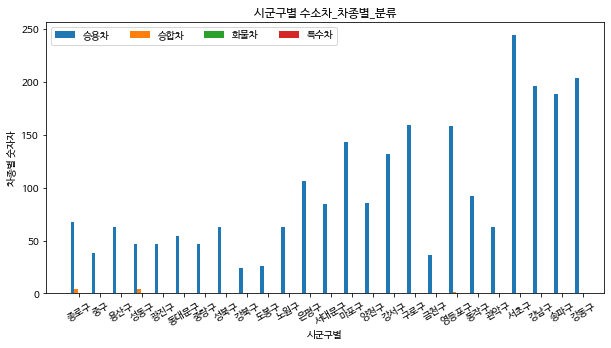

In [ ]:
#@title 시군구별 수소차 그래프 

w = 0.15
nrow = suso.shape[0] # 행의 갯수
idx = np.arange(nrow) #행의 갯수를 리스트로

plt.figure(figsize = (10, 5))
plt.title('시군구별 수소차_차종별_분류')
plt.xlabel('시군구별')
plt.ylabel('차종별 숫자자')
plt.bar(idx - 2 * w, suso['승용차'], width = w, label = '승용차')
plt.bar(idx - w, suso['승합차'], width = w, label = '승합차')
plt.bar(idx, suso['화물차'], width = w, label = '화물차')
plt.bar(idx + w, suso['특수차'], width = w, label = '특수차')
plt.xticks(idx, suso['시군구별'], rotation = 30)
plt.legend(ncol = 25)
plt.show()

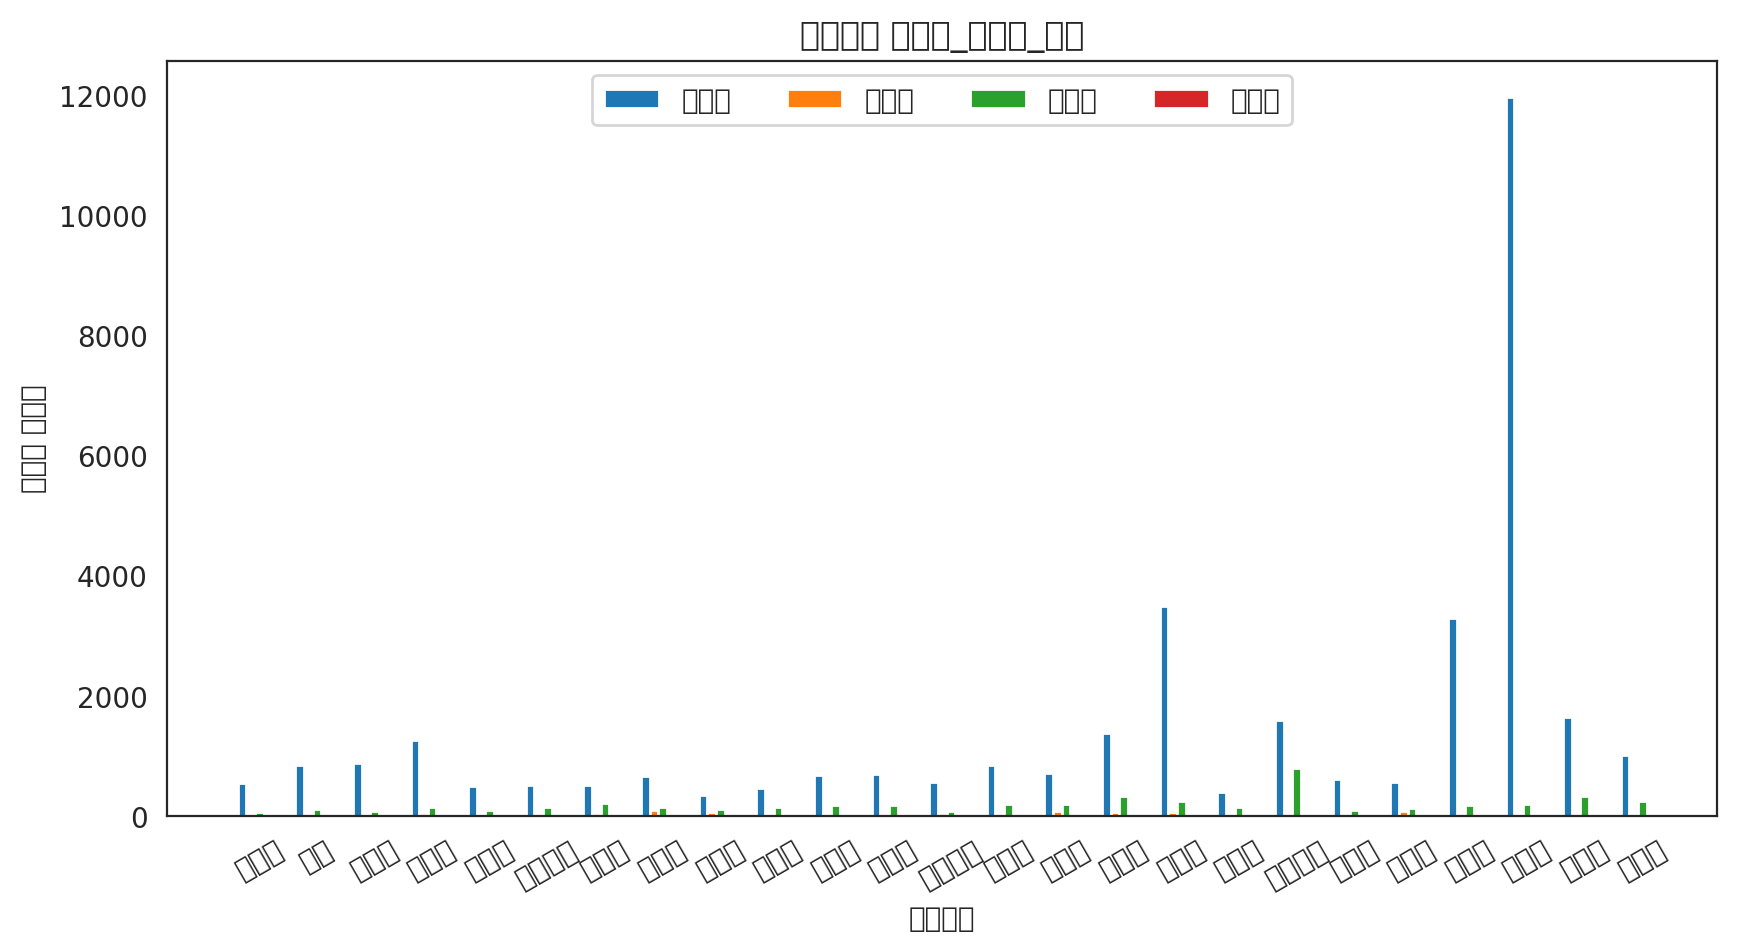

In [ ]:
w = 0.15
nrow = electro.shape[0] # 행의 갯수
idx = np.arange(nrow) #행의 갯수를 리스트로

plt.figure(figsize = (10, 5))
plt.title('시군구별 수소차_차종별_분류')
plt.xlabel('시군구별')
plt.ylabel('차종별 숫자자')
plt.bar(idx - 2 * w, electro['승용차'], width = w, label = '승용차')
plt.bar(idx - w, electro['승합차'], width = w, label = '승합차')
plt.bar(idx, electro['화물차'], width = w, label = '화물차')
plt.bar(idx + w, electro['특수차'], width = w, label = '특수차')
plt.xticks(idx, electro['시군구별'], rotation = 30)
plt.legend(ncol = 25)
plt.show()

In [ ]:
#@title 원하는 데이터로 가공

#2개의 데이터 병합 합집합으로 병합 
df = pd.merge(suso, electro, how='outer', on='시군구별')
print(df.head(5))

#필요없는 행 삭제 및 인덱스 이름 변경
#필요없는 열 삭제
df.drop(['승용차_x',  '승합차_x',  '화물차_x',  '특수차_x'], axis=1, inplace=True)
df.drop(['승용차_y',  '승합차_y',  '화물차_y',  '특수차_y'], axis=1, inplace=True)
df.drop(['연료별_x','연료별_y'], axis=1, inplace=True)

#인덱스 이름 변경
df.rename(columns={'총합_x':'수소차','총합_y':'전기차'}, inplace=True)
df

  시군구별 연료별_x  승용차_x  승합차_x  화물차_x  특수차_x  총합_x 연료별_y  승용차_y  승합차_y  화물차_y  \
0  종로구    수소     68    4.0    NaN    NaN    72    전기    542      7     63   
1   중구    수소     38    NaN    NaN    NaN    38    전기    854      3    111   
2  용산구    수소     63    NaN    NaN    NaN    63    전기    885      1     89   
3  성동구    수소     47    4.0    NaN    NaN    51    전기   1272     46    142   
4  광진구    수소     47    NaN    NaN    NaN    47    전기    505      8    107   

   특수차_y  총합_y  
0    NaN   612  
1    NaN   968  
2    NaN   975  
3    1.0  1461  
4    3.0   623  


,시군구별,수소차,전기차
0,종로구,72,612
1,중구,38,968
2,용산구,63,975
3,성동구,51,1461
4,광진구,47,623
5,동대문구,54,659
6,중랑구,47,778
7,성북구,63,926
8,강북구,24,514
9,도봉구,26,639


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 49

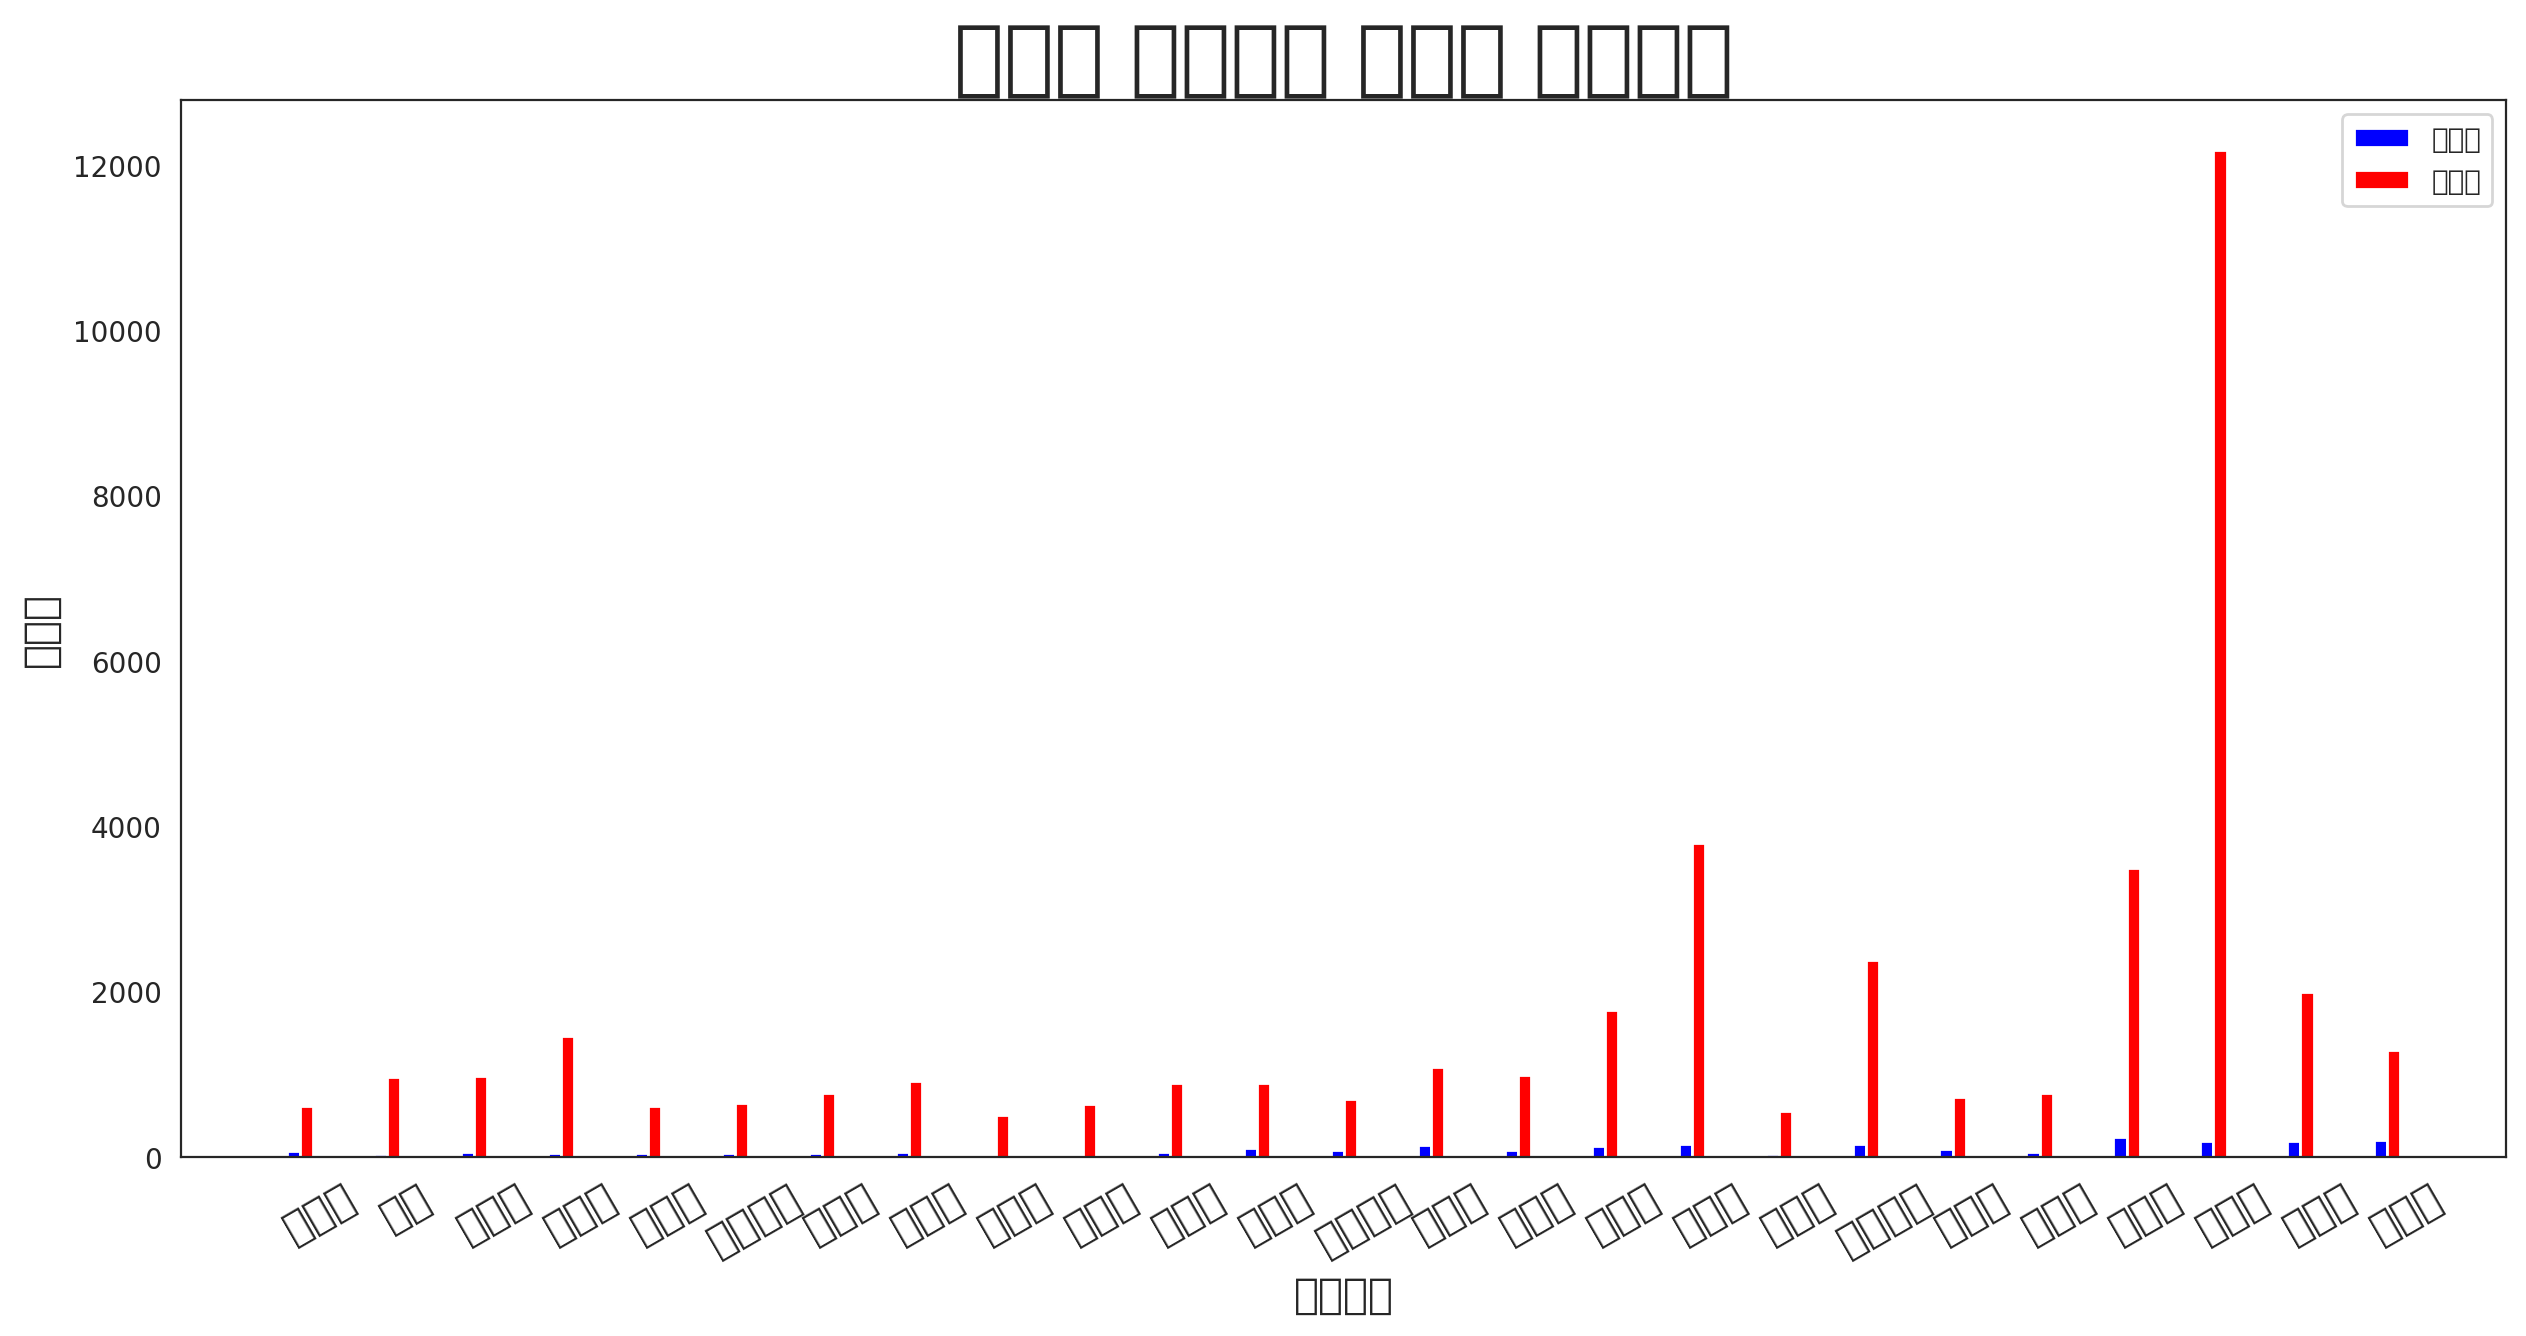

In [ ]:
#@title 서울시 시군구별 연료별 등록 현황

w = 0.15
nrow = df.shape[0] # 행의 갯수
idx = np.arange(nrow) #행의 갯수를 리스트로

#그래프 사이즈 결정
plt.figure(figsize = (15, 7))
plt.title('서울시 시군구별 연료별 등록현황',fontsize=30) #그래프 제목
plt.xlabel('시군구별',fontsize=15)            #x축 이름
plt.ylabel('등록수',fontsize=15)  #y축 이름름
plt.bar(idx - 2 * w, df['수소차'], width = w, label = '수소차',color='b')
plt.bar(idx - w , df['전기차'], width = w, label = '전기차',color='r')
plt.xticks(idx, df['시군구별'], rotation = 30,fontsize=15) #x축 label 회전 각도
plt.legend() # 그래프 범례 위치
plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.



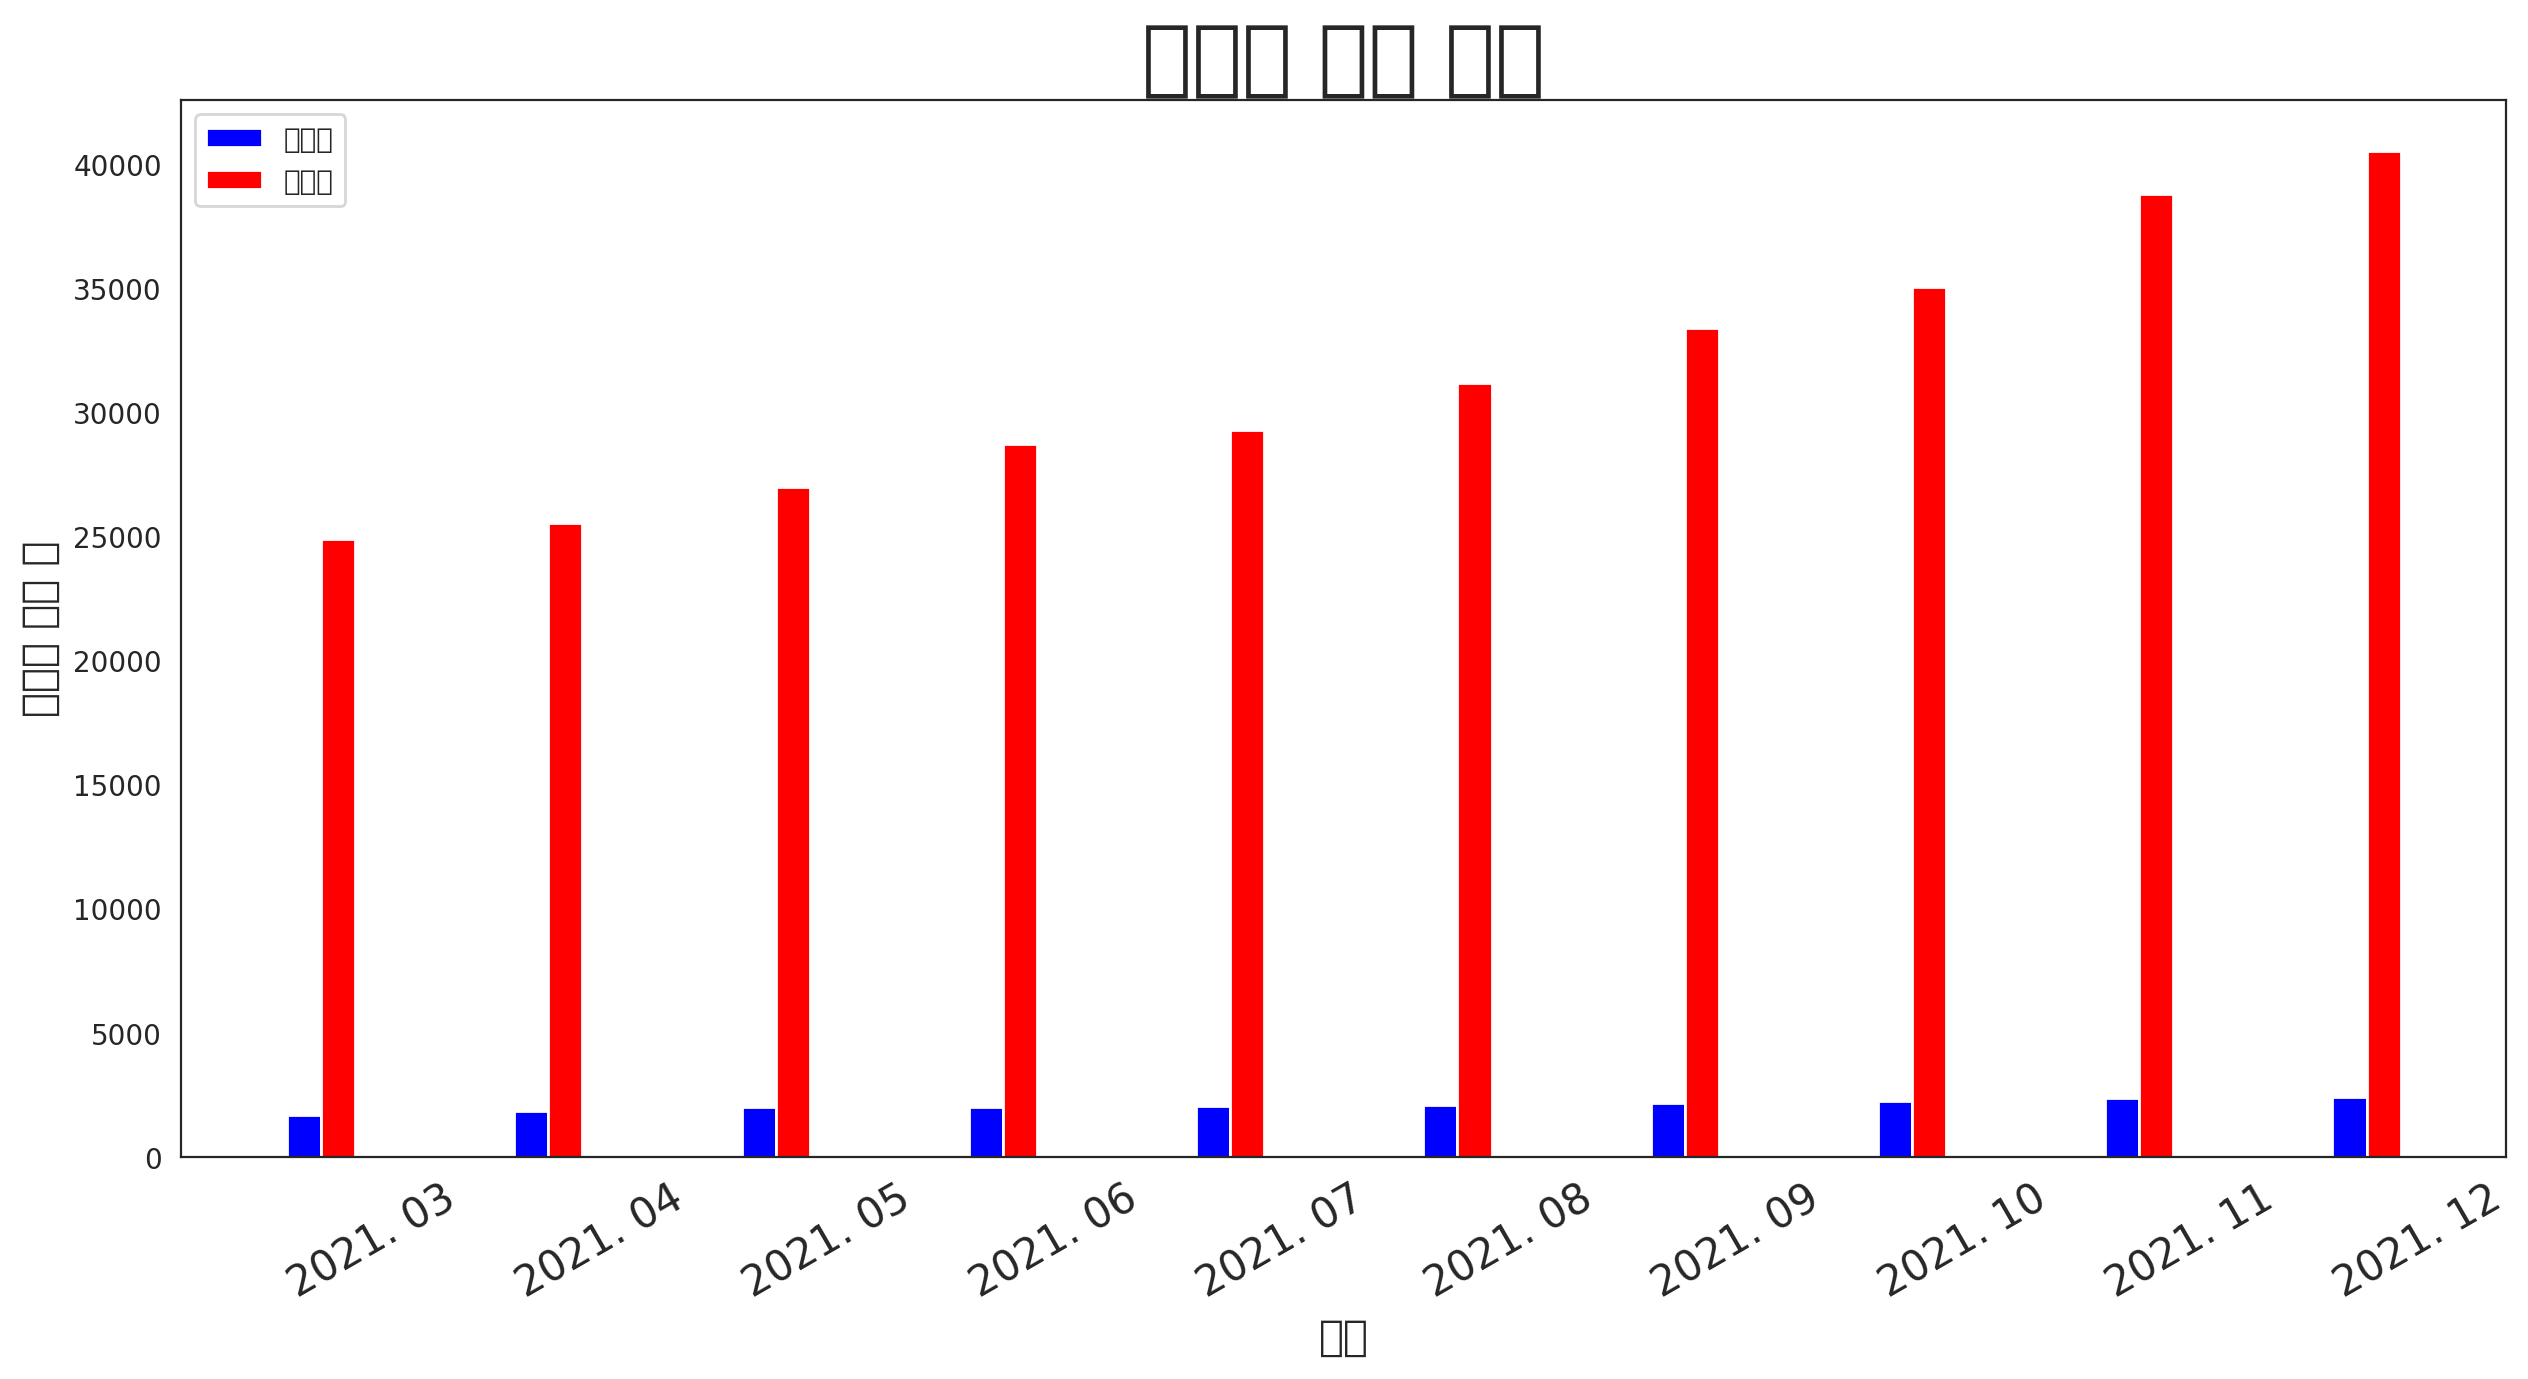

In [ ]:
#@title 서울시 2021.03 ~ 2021.12까지 연료별 차량 등록 수

w = 0.15
nrow = result.shape[0] # 행의 갯수
idx = np.arange(nrow) #행의 갯수를 리스트로

#그래프 사이즈 결정
plt.figure(figsize = (15, 7))
plt.title('연료별 등록 현황',fontsize=30) #그래프 제목
plt.xlabel('날짜',fontsize=15)            #x축 이름
plt.ylabel('연료별 등록 수',fontsize=15)  #y축 이름름
plt.bar(idx - 2 * w, result['수소'], width = w, label = '수소차',color='b')
plt.bar(idx - w , result['전기'], width = w, label = '전기차',color='r')
plt.xticks(idx, result['날짜'], rotation = 30,fontsize=15) #x축 label 회전 각도
plt.legend() # 그래프 범례 위치
plt.show()


<AxesSubplot:title={'center':'2021_연료별 증가추세'}, xlabel='날짜', ylabel='연료별'>

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 44032 (\N{HANGUL SYLLABLE GA}) mi

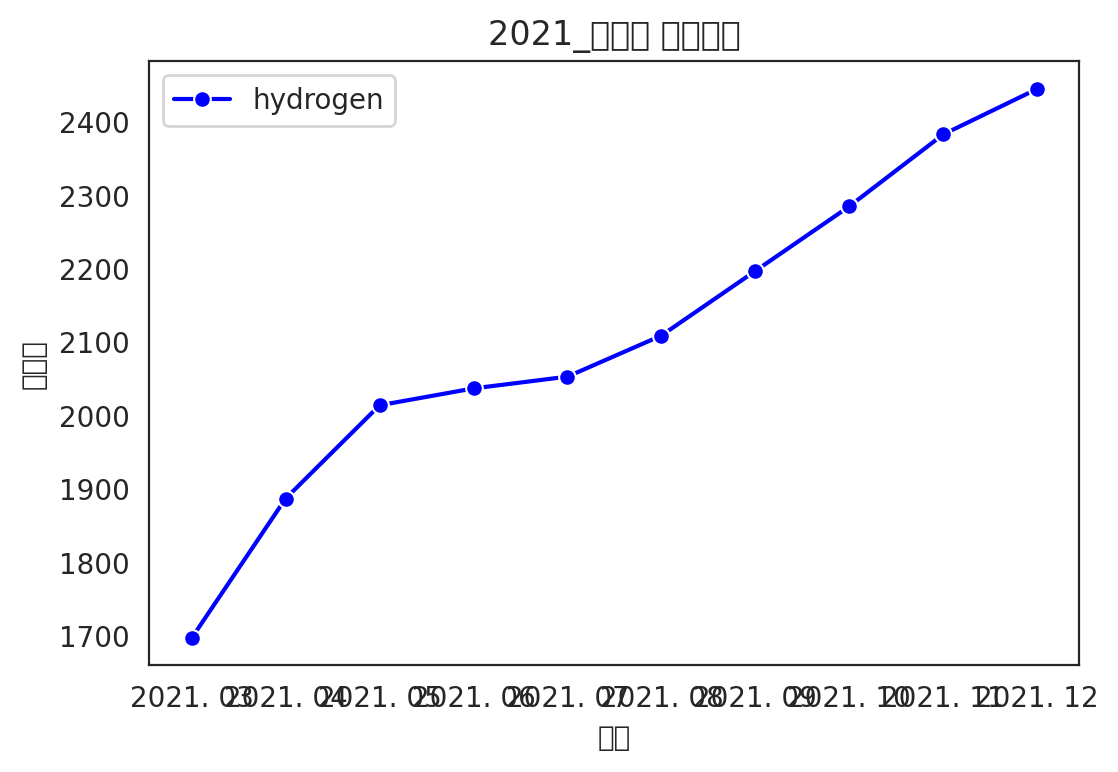

In [ ]:
#@title 증가그래프

#인덱스 변경
#result.set_index("날짜",inplace=True)

sns.set_style('white')
ax=sns.lineplot(data=result, x='날짜',y='수소',marker='o',color='b',linestyle='-',label='hydrogen')
ax.set(xlabel='날짜',ylabel='연료별',title='2021_연료별 증가추세')
#plt.figure(figzide=(20,10))
ax

In [ ]:
ax = px.bar(df, x='시군구별',y=['수소차','전기차'])
ax.update_layout(width=700)

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) mis

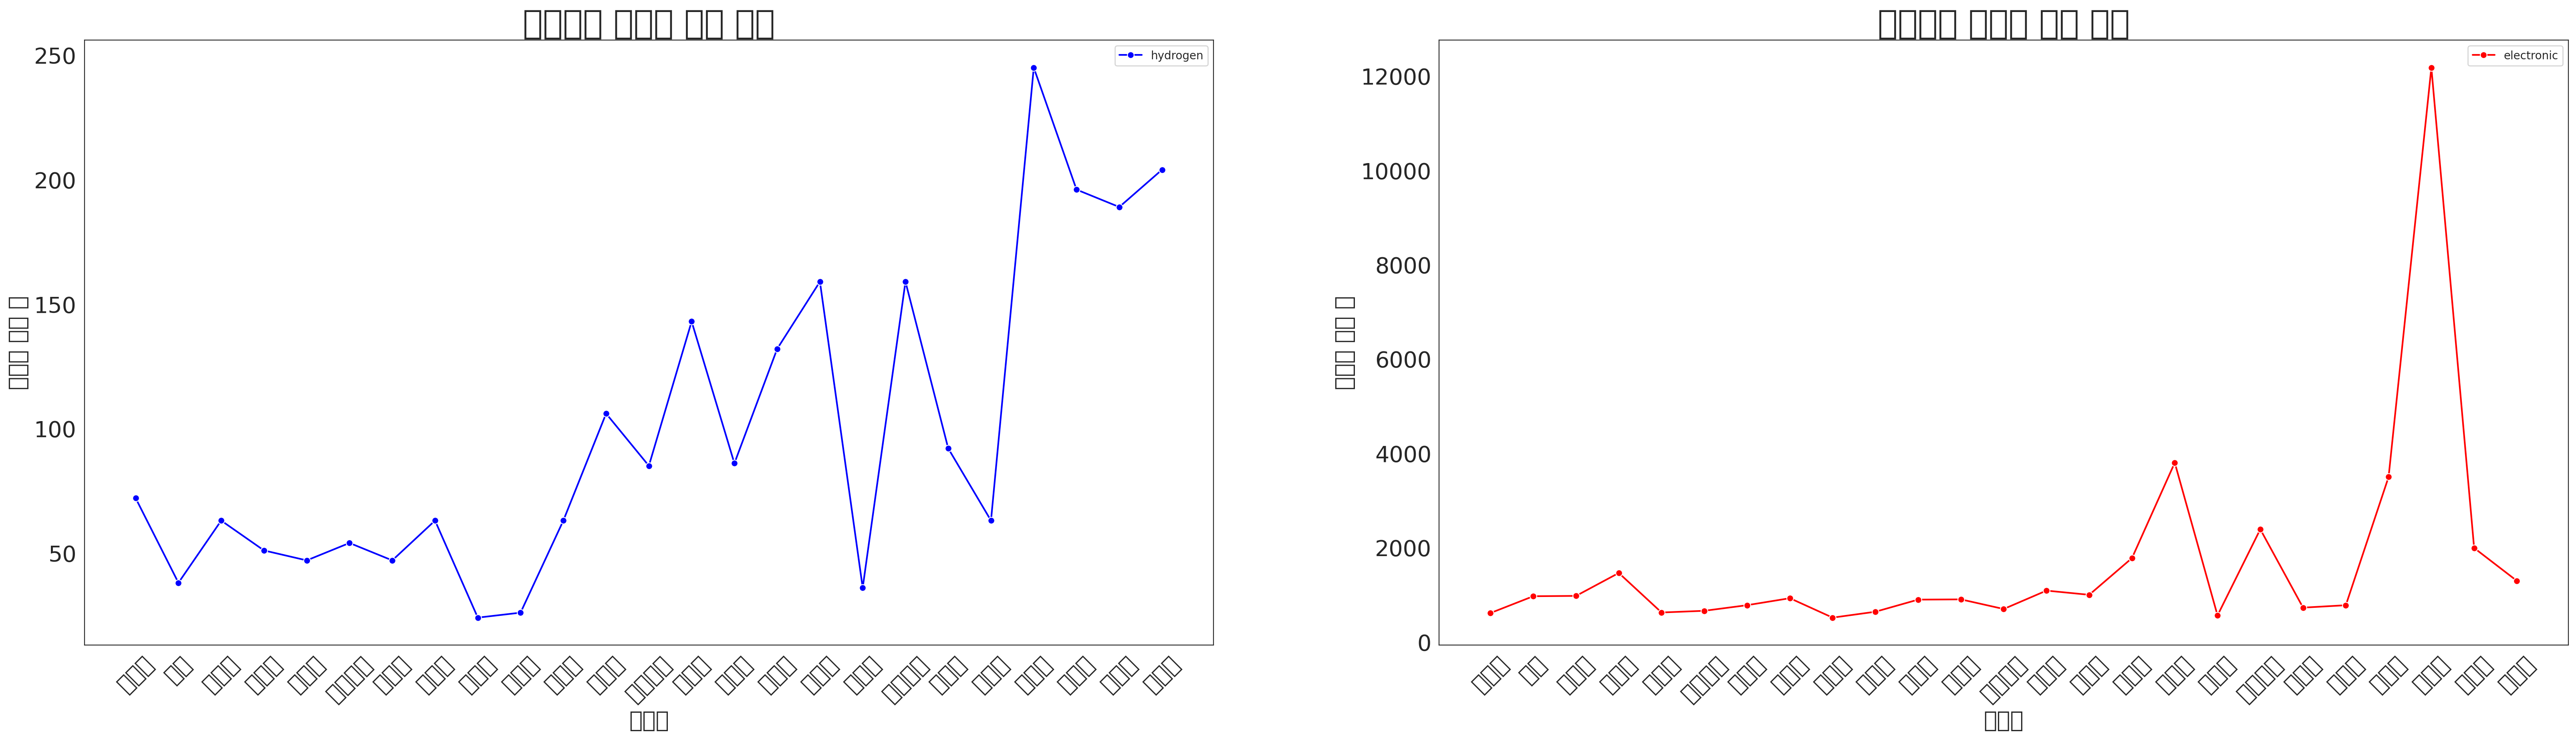

In [ ]:
#@title 시군구별 연료별 등록 현황
fig = plt.figure(figsize=(40,10))

ax1 = fig.add_subplot(1,2,1)
sns.lineplot(x=df['시군구별'], y=df['수소차'], marker='o', linestyle='-', color='b',label='hydrogen')
ax1.set_title('시군구별 수소차 등록 현황',fontsize=30)
ax1=plt.xlabel('시군구',fontsize=20)            #x축 이름
ax1=plt.xticks(fontsize=20,rotation=45)         #x축 눈금 폰트 사이즈 및 기울기 처리
ax1=plt.ylabel('수소차 등록 수',fontsize=20)    #y축 이름 및 사이즈
ax1=plt.yticks(fontsize=20)                     #y축 눈금 폰트 사이즈 변경

ax2 = fig.add_subplot(1,2,2)
sns.lineplot(x=df['시군구별'],y=df['전기차'], marker='o', linestyle='-', color='r',label='electronic')
ax2.set_title('시군구별 전기차 등록 현황',fontsize=30)
ax2=plt.xlabel('시군구',fontsize=20)            #x축 이름
ax2=plt.xticks(fontsize=20,rotation=45)         #x축 눈금 폰트 사이즈 및 기울기 처리
ax2=plt.ylabel('전기차 등록 수',fontsize=20)   #y축 이름름
ax2=plt.yticks(fontsize=20)                    #y축 눈금 폰트 사이즈 변경


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 49688 (\N{HANGUL SYLLABLE SU}) missin

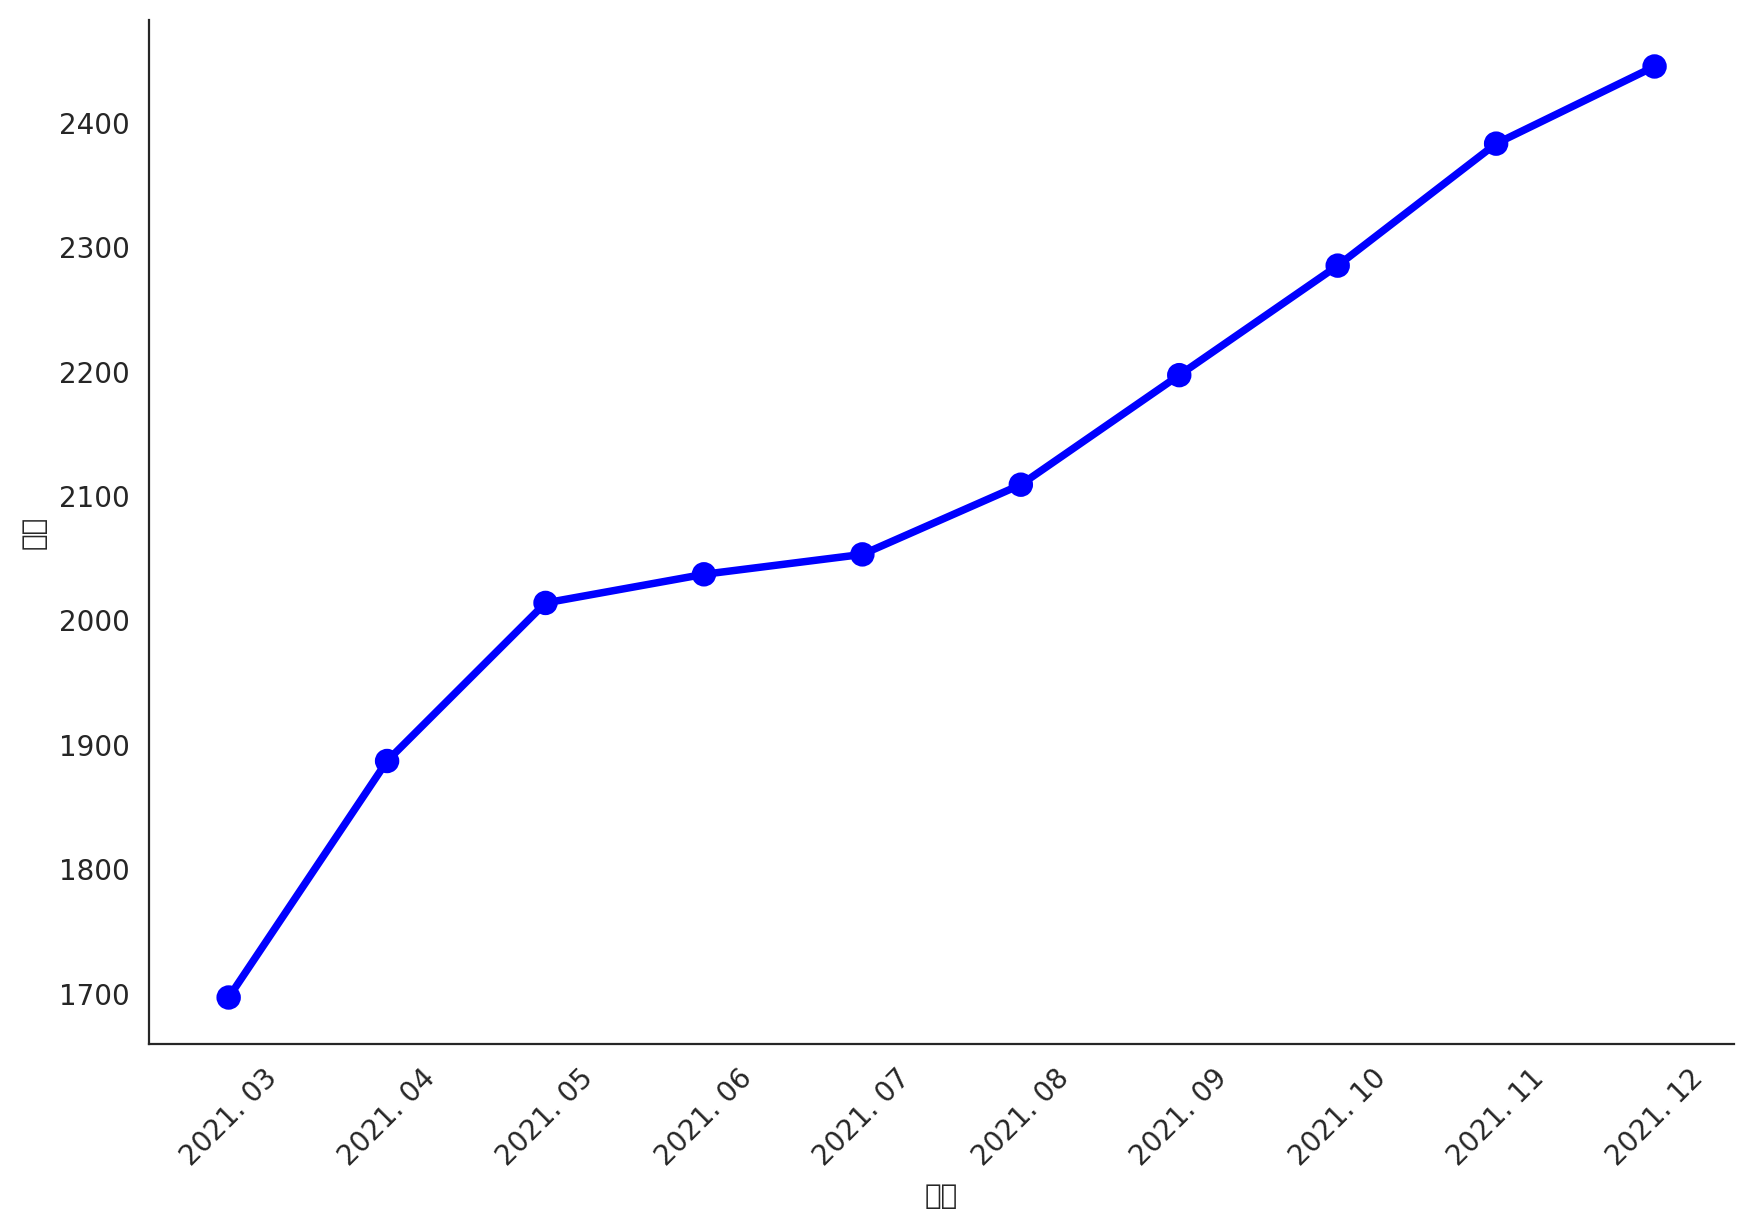

In [ ]:
fig = sns.catplot(data=result,x='날짜',y='수소',kind='point',color='blue')
fig.fig.set_size_inches(10,6)
plt.xticks(rotation = 45)
plt.show()

In [ ]:

#sns.lineplot(data=result,x='날짜',y='수소',marker='o',color='b',linestyle='-',label='hydrogen')
#fig.fig.set_size_inches(10,6)
#plt.xticks(rotation=45)
#plt.show()

#sns.lineplot(data=result,x='날짜',y='전기',marker='o',color='r',linestyle='-',label='electonic',ax=ax2)


/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing

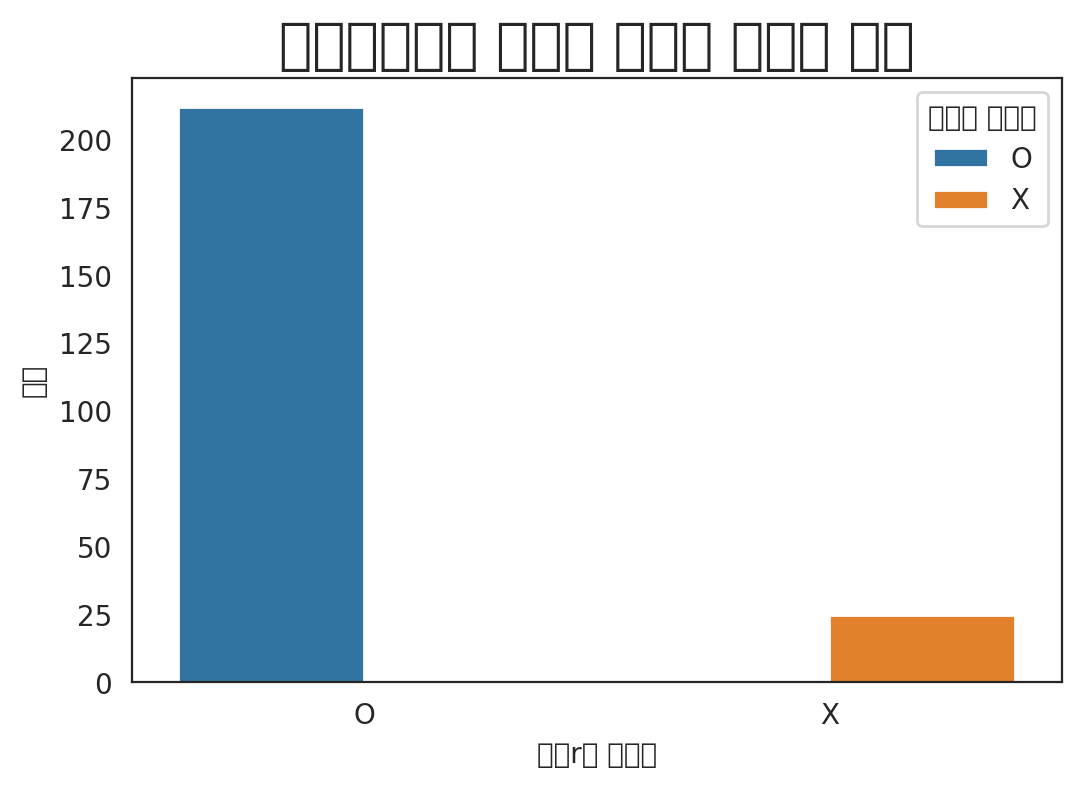

In [ ]:
#@title 한국도로공사 휴게소 전기차 충전소 현황

ax1 = sns.countplot(data=charge,x='전기차 충전소',hue='전기차 충전소')
ax1.set_title('한국도로공사 휴게소 전기차 충전소 유무',fontsize=20)
ax1=plt.xlabel('전기r차 충전소',fontsize=10)           #x축 이름
ax1=plt.xticks(fontsize=10)                           #x축 눈금 폰트 사이즈 및 기울기 처리
ax1=plt.ylabel('유무',fontsize=10)                    #y축 이름 및 사이즈
ax1=plt.yticks(fontsize=10)                           #y축 눈금 폰트 사이즈 변경


/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing

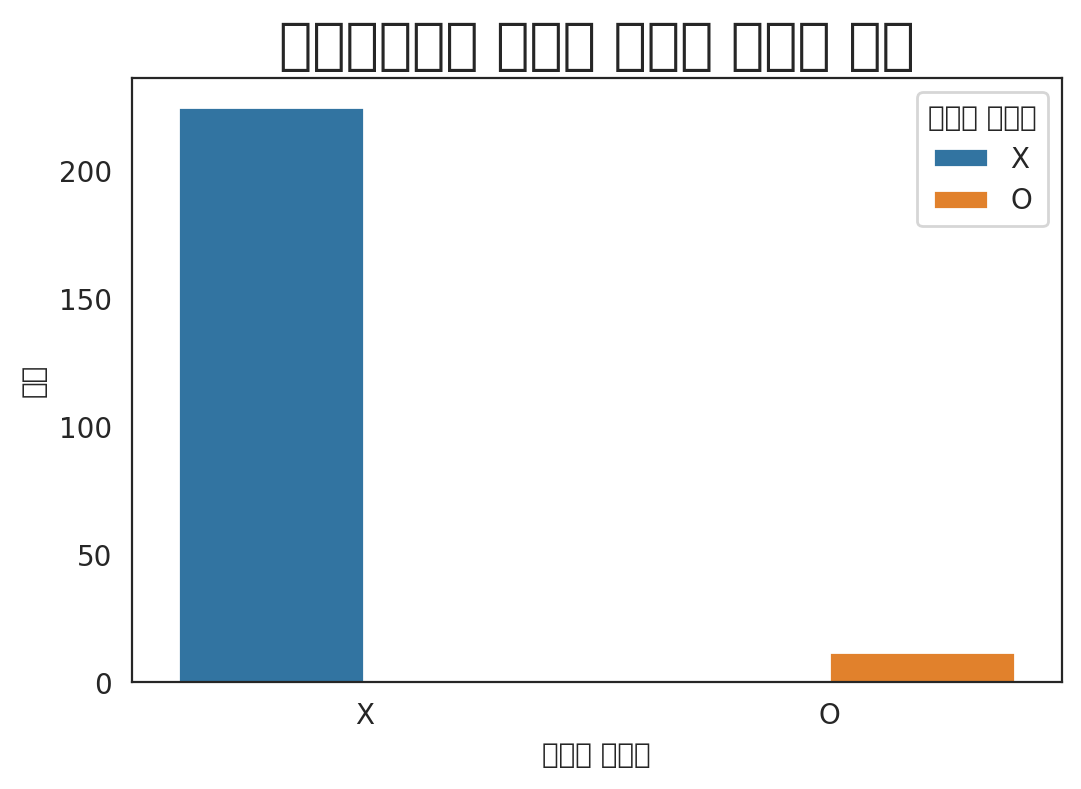

In [ ]:
#@title 한국도로공사 휴게소 수소차 충전소 현황

ax1 = sns.countplot(data=charge,x='수소차 충전소',hue='수소차 충전소')
ax1.set_title('한국도로공사 휴게소 수소차 충전소 유무',fontsize=20)
ax1=plt.xlabel('수소차 충전소',fontsize=10)           #x축 이름
ax1=plt.xticks(fontsize=10)                           #x축 눈금 폰트 사이즈 및 기울기 처리
ax1=plt.ylabel('유무',fontsize=10)                    #y축 이름 및 사이즈
ax1=plt.yticks(fontsize=10)                           #y축 눈금 폰트 사이즈 변경